In [16]:
import pandas as pd
import seaborn as sns
import numpy as np
import enchant
import cloudpickle
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
y = cloudpickle.load(open("pickles/forum_label.pkl", "rb" ) )

In [3]:
disease_db = cloudpickle.load(open("pickles/disease_db.pkl", "rb" ) )

In [4]:
tfidf = cloudpickle.load(open("pickles/forum_vecrepresent.pkl", "rb" ) )
forum_vectorizer = cloudpickle.load(open("pickles/forum_vectorizer.pkl", "rb" ) )

In [5]:
print y.shape

(13458, 72)


Just randomly assigning some pregnancies to be 0 cause they are super over represented

In [6]:
dropi = [i for i,d in enumerate(disease_db) if d['name']=='pregnancy'][0]
tozero = y[:,dropi]==1
y[tozero,dropi]=1*(np.random.random((tozero.sum(),))<0.1)

In [7]:
print y[:,dropi].sum()
print tfidf.shape
print y.shape

872
(13458, 836)
(13458, 72)


In [8]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(tfidf, y, test_size=0.1, random_state=42)

In [31]:
# from sklearn.naive_bayes import MultinomialNB
# clf = MultinomialNB().fit(tfidf_train, y_train)
from sklearn.metrics import log_loss
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
# rfscores = []
for nest in [10,20]:
    for mdep in [20,40,60]:
        print str(nest)+" "+str(mdep)
        clf = %time OneVsRestClassifier(RandomForestClassifier(n_estimators=nest,max_depth=mdep)).fit(X_train, y_train)
        with open("pickles/test_classifier.pkl", 'wb') as handle:
            cloudpickle.dump(clf, handle)
        sz = os.stat("pickles/test_classifier.pkl").st_size
#         predicted = clf.predict_proba(X_test)
#         prob = np.array([a[:,1] for a in predicted]).T
#         ll = log_loss(y_test,prob)
        acc = accuracy_score(clf.predict(X_test), y_test)
        rfscores.append((sz,acc,ll))
        del clf


10 20
CPU times: user 45.7 s, sys: 52 ms, total: 45.7 s
Wall time: 46.5 s
10 40
CPU times: user 1min 1s, sys: 100 ms, total: 1min 1s
Wall time: 1min 1s
10 60
CPU times: user 1min 7s, sys: 48 ms, total: 1min 8s
Wall time: 1min 8s
20 20
CPU times: user 1min 28s, sys: 44 ms, total: 1min 28s
Wall time: 1min 28s
20 40
CPU times: user 1min 59s, sys: 116 ms, total: 1min 59s
Wall time: 1min 59s
20 60
CPU times: user 2min 12s, sys: 64 ms, total: 2min 12s
Wall time: 2min 12s


In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
clf = OneVsRestClassifier(LogisticRegression()).fit(X_train, y_train)
with open("pickles/test_classifier.pkl", 'wb') as handle:
    cloudpickle.dump(clf, handle)
sz = sz = os.stat("pickles/test_classifier.pkl").st_size
prob = clf.predict_proba(X_test)
ll = log_loss(y_test,prob)
acc = accuracy_score(clf.predict(X_test), y_test)
lrscore=(sz,acc,ll)
del clf

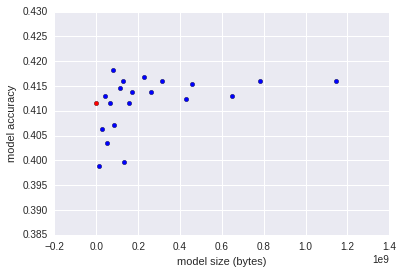

In [29]:
plt.scatter(x=[x[0] for x in rfscores],
           y=[x[1] for x in rfscores])
plt.scatter(x=sz,y=acc,c='r')
plt.xlabel('model size (bytes)')
plt.ylabel('model accuracy')

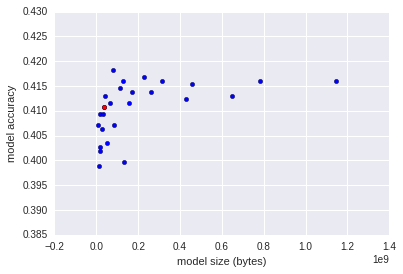

In [32]:
plt.scatter(x=[x[0] for x in rfscores],
           y=[x[1] for x in rfscores])
plt.scatter(x=sz,y=acc,c='r')
plt.xlabel('model size (bytes)')
plt.ylabel('model accuracy')